# Maximum Likelihood (part 01)
```
Shivam Kumaran
sc17b122
date 13/11/2020
Computational Astrophysics
```

### Importing required Modules

In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import matplotlib.gridspec as gs
plt.style.use('seaborn-dark-palette')

In [2]:
from histogram_utils import pdf_const_bin , histogram
from probability_utils import calc_likelihood , gen_rand_n , gen_samples , min_lkhd

In [3]:
def scatter_dist(alpha):
    def to_return(x):
        N = 2*(1+alpha/3)
        val = (1+alpha*(x**2))/N
        return val
    return to_return

def simulate_scatter(alpha , N):
    y_max = (1+alpha)/(2*(1+alpha/3))
    y = gen_samples(scatter_dist(alpha) , -1 , 1 , y_max , N)
    return y

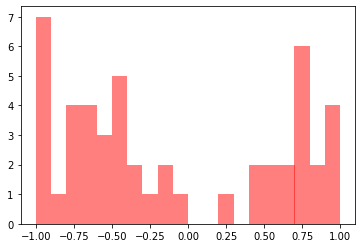

In [4]:
data =  np.loadtxt('list' , delimiter=',')
dist_obs , bins_obs = histogram(data , int(20)) 

fig  = plt.figure(figsize=(6,4))
spec = gs.GridSpec(ncols=1 , nrows=1)
ax1 = fig.add_subplot(spec[0,0])
ax1.bar(bins_obs, dist_obs ,  width=0.1 , color='red' , alpha = 0.5 )
#ax1.plot(x ,y_th , color='k')
#ax1.legend(['true PDF' , 'simulated data N: 500'])
plt.show()

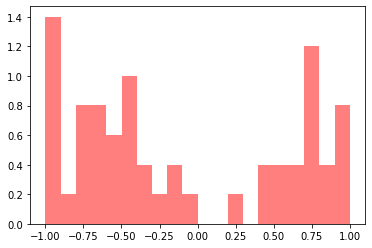

In [5]:
dist_obs , bins_obs = pdf_const_bin(data , 20)
width_obs = bins_obs[1]-bins_obs[0]

fig  = plt.figure(figsize=(6,4))
spec = gs.GridSpec(ncols=1 , nrows=1)
ax1 = fig.add_subplot(spec[0,0])
ax1.bar(bins_obs, dist_obs ,  width=0.1 , color='red' , alpha = 0.5 )
#ax1.plot(x ,y_th , color='k')
#ax1.legend(['true PDF' , 'simulated data N: 500'])
plt.show()

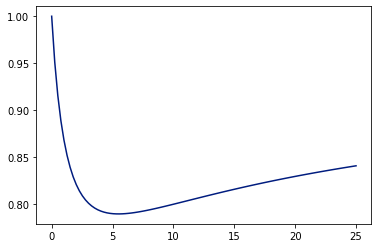

In [6]:
alpha = np.linspace(0 , 25 , 100)
neg_log_lh = []
for a in alpha:
    neg_log_lh.append(calc_likelihood(scatter_dist(a) , data , neg=True))

plt.plot(alpha , neg_log_lh / np.amin(neg_log_lh))
plt.show()

In [12]:
def find_extrema(pdf , d , p_min , p_max):
    p = p_min
    del_p = 0.1
    prev = calc_likelihood(scatter_dist(p) , d)
    nxt = calc_likelihood(scatter_dist(p+del_p) , d)
    grad = (nxt-prev)/del_p
    
    while(abs(grad)>1e-4):
        prev = calc_likelihood(scatter_dist(p) , d)
        nxt = calc_likelihood(scatter_dist(p+del_p) , d)
        #grd_prev = grad
        grad = (nxt-prev)/del_p
        del_p = 0.1
        p = p-(grad)*del_p
        #print(p)
    return p 
alpha_est = (find_extrema(scatter_dist ,data , 0 , 20))
print('Estimated alpha value :{:.4f}'.format(alpha_est))

Estimated alpha value :5.4332


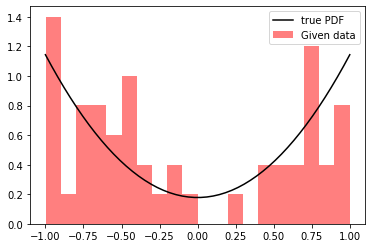

In [15]:
dist_obs , bins_obs = pdf_const_bin(data , 20)
width_obs = bins_obs[1]-bins_obs[0]

x = np.linspace(-1 , 1 )
y_th = scatter_dist(alpha_est)(x)

fig  = plt.figure(figsize=(6,4))
spec = gs.GridSpec(ncols=1 , nrows=1)
ax1 = fig.add_subplot(spec[0,0])
ax1.bar(bins_obs, dist_obs ,  width=0.1 , color='red' , alpha = 0.5 )
ax1.plot(x ,y_th , color='k')
ax1.legend(['true PDF' , 'Given data'])
plt.show()